# Arabic Dialect Identification - Exploratory Analysis & Data Pre-processing
## By Karim Elshetihy
- [Github](https://github.com/KarimElshetihy)
- [Linkedin](https://www.linkedin.com/in/karim-el-shetihy/)

#### Referances:
- [Arabic Dialict Identification in the Wild Paper](https://arxiv.org/pdf/2005.06557.pdf)
- [Flask Tutorial](https://programminghistorian.org/en/lessons/creating-apis-with-python-and-flask)
- [Multinomial Classification](https://towardsdatascience.com/the-complete-guide-to-neural-networks-multinomial-classification-4fe88bde7839)

#### The Dataset:
The dataset and the dialect identification problem were addressed by Qatar Computing Research Institute, moreover, they published a paper, feel free to get more insights from it [Here](https://arxiv.org/pdf/2005.06557.pdf).

We are given a dataset which has 2 columns, **id** and **dialect**.
- Target label column is the **dialect***, which has 18 classes.
- The **id** column will be used to retrieve the text, to do that, you need to call this API by a
POST request. https://recruitment.aimtechnologies.co/ai-tasks.
- The request body must be a JSON as a list of strings, and the size of the list must NOT exceed 1000.
- The API will return a dictionary where the keys are the ids, and the values are the text, here is a request and response sample.

### Importing Packages

In [1]:
import time
import sys
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

np.random.seed(1)
%matplotlib inline
sb.set_theme()
output_notebook()

import warnings
warnings.simplefilter("ignore")

Loading BokehJS ...

### Importing the Dataset

In [2]:
data = pd.read_csv("../Data/clean_text.csv")
df = data.copy()
df = data.sample(frac=1).reset_index(drop=True)

### Exploring the Data

In [3]:
df.head()

,id,dialect,text
0,1137076371669311616,OM,يالله محصلين حد يرد عليهم خلوا حد يقول رأيه لا...
1,1163759504154083328,LB,صحيح غالي وهو متوفر فترة محلات السوبرماركت الك...
2,1176996529388883968,PL,عالم تعبانة صاحبي
3,1171858945000054784,JO,طيب بلكي بدهم اياه منصب آخر
4,1079860536605585408,LB,ينعاد عليك رفيق جاد سنة خير عليك انشالله


In [4]:
df.shape

(458197, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

id         458197
dialect        18
text       457684
dtype: int64

In [8]:
df['dialect'].unique()

array(['OM', 'LB', 'PL', 'JO', 'KW', 'LY', 'AE', 'EG', 'SA', 'QA', 'MA',
       'BH', 'DZ', 'YE', 'SY', 'IQ', 'TN', 'SD'], dtype=object)

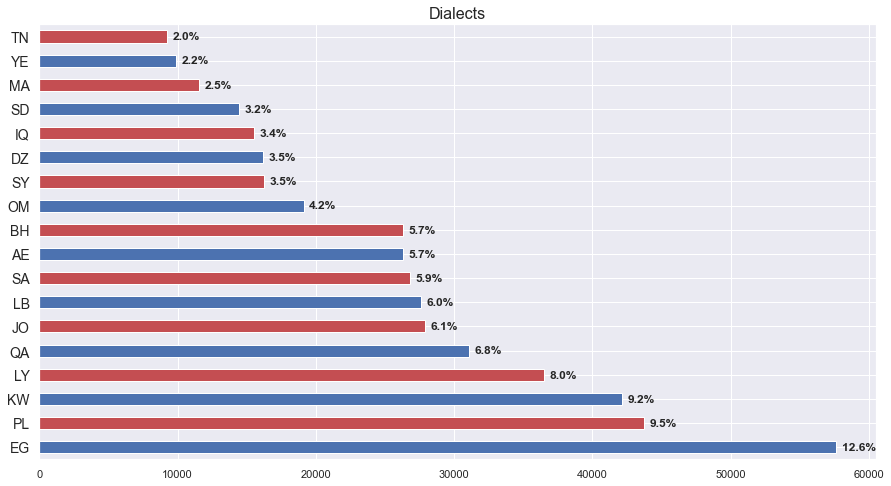

In [9]:
font_size1 = 16
font_size2 = 12

# Setting up figure sizes
rcParams['figure.figsize'] = 15,6
colors=['#4c72b0','#d44e52']

# sb.countplot(df['dialect']);
df['dialect'].value_counts().plot(kind='barh', figsize=(15,8), color=['b','r']);
plt.title('Dialects', fontsize=font_size1);

plt.yticks(fontsize= font_size2+2);
plt.ylabel('');

Sum = df['dialect'].value_counts().sum()
for num, value in enumerate(df['dialect'].value_counts()):
    plt.text(value+400,num,str(np.round(value/Sum*100, decimals = 1))+'%', fontweight='bold',va='center');

---

### Pre-paring the Data for the Model

In [11]:
df.head()

,id,dialect,text
0,1137076371669311616,OM,يالله محصلين حد يرد عليهم خلوا حد يقول رأيه لا...
1,1163759504154083328,LB,صحيح غالي وهو متوفر فترة محلات السوبرماركت الك...
2,1176996529388883968,PL,عالم تعبانة صاحبي
3,1171858945000054784,JO,طيب بلكي بدهم اياه منصب آخر
4,1079860536605585408,LB,ينعاد عليك رفيق جاد سنة خير عليك انشالله


In [12]:
df = df.join(pd.get_dummies(df['dialect']))

In [13]:
df.head()

,id,dialect,text,AE,BH,DZ,EG,IQ,JO,KW,...,LY,MA,OM,PL,QA,SA,SD,SY,TN,YE
0,1137076371669311616,OM,يالله محصلين حد يرد عليهم خلوا حد يقول رأيه لا...,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1163759504154083328,LB,صحيح غالي وهو متوفر فترة محلات السوبرماركت الك...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1176996529388883968,PL,عالم تعبانة صاحبي,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1171858945000054784,JO,طيب بلكي بدهم اياه منصب آخر,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1079860536605585408,LB,ينعاد عليك رفيق جاد سنة خير عليك انشالله,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 21 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458197 non-null  object
 3   AE       458197 non-null  uint8 
 4   BH       458197 non-null  uint8 
 5   DZ       458197 non-null  uint8 
 6   EG       458197 non-null  uint8 
 7   IQ       458197 non-null  uint8 
 8   JO       458197 non-null  uint8 
 9   KW       458197 non-null  uint8 
 10  LB       458197 non-null  uint8 
 11  LY       458197 non-null  uint8 
 12  MA       458197 non-null  uint8 
 13  OM       458197 non-null  uint8 
 14  PL       458197 non-null  uint8 
 15  QA       458197 non-null  uint8 
 16  SA       458197 non-null  uint8 
 17  SD       458197 non-null  uint8 
 18  SY       458197 non-null  uint8 
 19  TN       458197 non-null  uint8 
 20  YE       458197 non-null  uint8 
dtypes: int64(1

In [15]:
def count_words(data, dialect):
    total_words_counts = Counter()
    dialect_words = Counter()

    for num, text in enumerate(data['text']):
        if data['dialect'][num] == dialect:
            for word in text.split(" "):
                dialect_words[word] += 1
                total_words_counts[word] += 1

    return dialect_words, total_words_counts

In [16]:
def calculate_ratio(count_of_dialect_words, total_words_counts):
    dialect_ratios = Counter()

    for term, count in list(total_words_counts.most_common()):
        ratio = count_of_dialect_words[term] / total_words_counts[term]+1 # Avoiding Zero Division
        dialect_ratios[term] = ratio
    return dialect_ratios

In [17]:
def log_of_ratios(cutoff, ratios_of_dialect_words):
    dialect_logs = Counter()

    for term, ratio in list(ratios_of_dialect_words.most_common()):
        if ratio > cutoff:
            dialect_logs[term] = np.log(ratio)
    return dialect_logs

In [18]:
def unique_terms(data, logs_of_dialect_words):
    # Making a list of unique terms
    high_weight_terms = set()
    for dialect in data['dialect'].unique():
        for term in logs_of_dialect_words[dialect].keys():
            high_weight_terms.add(term)

    high_weight_terms = list(high_weight_terms)
    return high_weight_terms

In [19]:
def term_to_index(data, logs_of_dialect_words):

    # Unique Terms List
    terms_list = unique_terms(data, logs_of_dialect_words)
    # Unique Targets List
    targets_uniq = list(data['dialect'].unique())

    # Unique Lists Sizes
    text_terms_size = len(terms_list)
    targets_uniq_size = len(targets_uniq)

    # Converting Terms to Indicies
    terms_indicies = Counter()
    for index, term in enumerate(terms_list):
        terms_indicies[term] = index

    # Converting Targets to Indicies
    targets_indicies = Counter()
    for index, target in enumerate(targets_uniq):
        targets_indicies[target] = index

    # Specifying Input Layer Size
    input_nodes = len(terms_list)
    print('Input Shape: {}'.format(input_nodes))

    return input_nodes, terms_indicies


In [20]:
def pre_process(data, cutoff=1.2):
    # Pre-processing Text Data
    print("### Pre-processing Text Data...")
    count_of_dialect_words = Counter()
    ratios_of_dialect_words = Counter()
    logs_of_dialect_words = Counter()
    #--------------------------------------------------------------------------------------#
    # Calculating Counts
    for dialect in data['dialect'].unique():
        count_of_dialect_words[dialect], total_words_counts = count_words(data, dialect)

    #--------------------------------------------------------------------------------------#
    # Calculating Ratios
    for dialect in data['dialect'].unique():
        ratios_of_dialect_words[dialect] = calculate_ratio(count_of_dialect_words[dialect], count_of_dialect_words[dialect])

    #--------------------------------------------------------------------------------------#
    # Calculating Logs
    for dialect in data['dialect'].unique():
        logs_of_dialect_words[dialect] = log_of_ratios(cutoff, ratios_of_dialect_words[dialect])

    #--------------------------------------------------------------------------------------#
    # Converting Terms and Targets to Indiceis
    input_nodes, terms_indicies = term_to_index(data, logs_of_dialect_words)
    #--------------------------------------------------------------------------------------#    
    return input_nodes, terms_indicies, logs_of_dialect_words


In [28]:
input_nodes, terms_indicies, logs_of_dialect_words = pre_process(df, cutoff=1.4)

### Pre-processing Text Data...
Input Shape: 503490


In [31]:
logs_of_dialect_words['EG'].most_common(10)

[('ده', 0.6931471805599453),
 ('فى', 0.6931471805599453),
 ('ايه', 0.6931471805599453),
 ('هو', 0.6931471805599453),
 ('دي', 0.6931471805599453),
 ('علي', 0.6931471805599453),
 ('لو', 0.6931471805599453),
 ('اللى', 0.6931471805599453),
 ('ان', 0.6931471805599453),
 ('مصر', 0.6931471805599453)]

#### Visualizing the Logs

In [29]:
for dialect in df['dialect'].unique():
    hist, edges = np.histogram(list(map(lambda x:x[1], reversed(logs_of_dialect_words[dialect].most_common()))), 
                              density=True, bins=100,normed=True)

    p = figure(tools='pan,wheel_zoom,reset,save', 
               toolbar_location='above',
               title = dialect+' Terms Ratios Affinity Distribution')

    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color='#555555')
    show(p)

### Building the Model

In [23]:
class ClassifierNetwork:
    def __init__(self, data, logs_of_dialect_words, terms_indicies, input_nodes, hidden_nodes=18, learning_rate=0.01):
        
        # Initialize input variables
        self.logs_of_dialect_words = logs_of_dialect_words
        self.terms_indicies = terms_indicies
        self.text_df = data['text']
        self.targets = data['dialect']
        self.targets_vector = data[df.columns[-18:]]
        
        # self.input_nodes = len(self.text_terms)
        self.input_nodes = input_nodes
        self.output_nodes = 18
        self.hidden_nodes = hidden_nodes
        self.learning_rate = learning_rate
        self.count_margin = 50
        self.ratio_margin = 1
        
        
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)
        
        # Directly initialize the network layers
        self.init_network()
    #--------------------------------------------------------------------------------------#
     
    #--------------------------------------------------------------------------------------#
    def init_network(self):
        # Initializing the training net
        print("### Initializing the training net...")
        #--------------------------------------------------------------------------------------#
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, (self.hidden_nodes, self.output_nodes))
        self.layer_1 = np.zeros((1, self.hidden_nodes))
        print("### Net is ready to be trained...")
    
    #--------------------------------------------------------------------------------------#
    def update_input(self, input_text):
        # Clear previuos inputs
        self.input_layer = np.zeros((self.input_nodes, self.hidden_nodes))
        self.input_layer *= 0

        # Getting the number of words in the text
        for term in input_text.split(" "):
            self.input_layer[0][self.terms_indicies[term]] = 1 # = 1 instead of += 1
        return self.input_layer
    
    #--------------------------------------------------------------------------------------#
    def softmax(self, logits):
        e_x = np.exp(logits - np.max(logits))
        return e_x / e_x.sum()
    
    #--------------------------------------------------------------------------------------#
    def softmax_dervitive(self, softout):
        softout = softout.reshape(-1,1)
        return np.diagflat(softout) - np.dot(softout, softout.T)
 

    
    #--------------------------------------------------------------------------------------#
    #--------------------------------------------------------------------------------------#
    #--------------------------------------------------------------------------------------#
    #--------------------------------------------------------------------------------------#
    #--------------------------------------------------------------------------------------#
    #--------------------------------------------------------------------------------------#
    #--------------------------------------------------------------------------------------#
    def train(self, training_size=30000):
        # Training net
        print("### Training net...")
        #--------------------------------------------------------------------------------------#
        self.training_size = training_size
        self.training_text = self.text_df[:self.training_size]
        self.training_targets = self.targets_vector[:self.training_size]
        
        #--------------------------------------------------------------------------------------#
        # Generating the Input Layer
        training_terms_indicies = list()
        for text in self.training_text:
            indicies_of_terms = set()
            for term in text.split(" "):
                if term in self.terms_indicies.keys():
                    # Add the index of the term from terms_indicies
                    indicies_of_terms.add(self.terms_indicies[term])
            training_terms_indicies.append(list(indicies_of_terms))
        
        # Making sure the training text and targets are equal
        assert(len(training_terms_indicies) == len(self.training_targets))
        
        #--------------------------------------------------------------------------------------#
        correct = 0
        start_time = time.time()
        
        #--------------------------------------------------------------------------------------#
        # Selecting the input Text & Target
        for index, text in enumerate(training_terms_indicies):
            text = training_terms_indicies[index]
            target = self.training_targets[index:index+1].values
            
            # Forward Propagation
            # Hidden layer
            self.layer_1 *= 0
            for num in text:
                # Adding in only the weights for non-zero terms
                self.layer_1 += self.weights_0_1[num]
            
            # Output layer
            layer_2 = self.softmax(self.layer_1.dot(self.weights_1_2))
        #--------------------------------------------------------------------------------------#
            
            # Back Propagation or Backward Pass
            # Output error
            layer_2_error = target - layer_2
            layer_2_delta = layer_2_error * self.softmax_dervitive(layer_2)
            
            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error
            
            # Update the weights
            self.weights_1_2 += self.layer_1.dot(layer_2_delta) * self.learning_rate
            
            # Only update the weights that were used in the forward pass
            for num in text:
                self.weights_0_1[num] += layer_1_delta[0] * self.learning_rate
            
            # Keep track of correct predictions.
            if(np.argmax(target) == np.argmax(layer_2)):
                correct += 1
#                 print(np.argmax(target), np.argmax(layer_2))
                
            
            # Print out our prediction accuracy and speed 
            # throughout the training process.
            text_per_second = index / (time.time()+1 - start_time)
            progress = (100 * index / len(training_terms_indicies))
            training_accuracy = correct * 100 / float(index+1)
            
            sys.stdout.write("\rProgress:" + str(progress)[:4] \
                              + "% Speed(cells/sec):" + str(text_per_second)[0:5] \
                              + " #Correct:" + str(correct) + " #Trained:" + str(index+1) \
                              + " Training Accuracy:" + str(training_accuracy)[:4] + "%")
            
            

        end_time = time.time()
        training_time = end_time - start_time
    
    
    #--------------------------------------------------------------------------------------#
    def test(self):
        self.testing_text = self.text_df[-self.training_size:]
        self.testing_targets = self.targets[-self.training_size:]
        
        testing_terms_indicies = list()
        for text in self.testing_text:
            indicies_of_terms = set()
            for term in text.split(" "):
                if term in self.terms_indicies.keys():
                    # Add the index of the term from terms_indicies
                    indicies_of_terms.add(self.terms_indicies[term])
            testing_terms_indicies.append(list(indicies_of_terms))
        
        # Making sure the training text and targets are equal
        assert(len(testing_terms_indicies) == len(self.testing_targets))
        
        correct = 0
        start_time = time.time()
        
        for num, text in enumerate(self.testing_text):
            text = testing_terms_indicies[num]
            target = self.testing_targets[num:num+1].values
            predection = self.run(text)
            
            if(np.argmax(target) == np.argmax(predection)):
                correct += 1
            
                
            text_per_second = num / (time.time() - start_time)+1
            progress = (100 * num / len(self.testing_text))
            training_accuracy = correct * 100 / float(num+1)
            
            sys.stdout.write("\rProgress:" + str(progress)[:4] \
                              + "% Speed(reviews/sec):" + str(text_per_second)[0:5] \
                              + " #Correct:" + str(correct) + " #Trained:" + str(num+1) \
                              + " Training Accuracy:" + str(training_accuracy)[:4] + "%")
            
            
    #--------------------------------------------------------------------------------------#
    def run(self, text):
        self.update_input(text)
        layer_1 = self.input_layer.dot(self.weights_0_1)
        layer_2 = self.softmax(self.layer_1.dot(self.weights_1_2))
        
        return layer_2
         

### Defining the Classifier

In [24]:
classifier = ClassifierNetwork(df[df.columns[-20:]], logs_of_dialect_words, terms_indicies, input_nodes, hidden_nodes=18, learning_rate=0.0001)

### Initializing the training net...
### Net is ready to be trained...


### Training the Classifier 

In [25]:
classifier.train(training_size = 400000)

### Training net...
Progress:99.9% Speed(cells/sec):2145. #Correct:22316 #Trained:400000 Training Accuracy:5.57%

In [26]:
# classifier.test()

### Not Finished Yet

In [27]:
# df['tokenized_text'] = df['text'].apply(simple_word_tokenize)